to look into:

- how often are there -1 values for precipitation? how will this impact the calculation by filtering them out?

- why do observations begin at 6pm local time? check documentation

- should the monthly seasons be divided differently? since may & june are rainiest months

notes:

- compared precipitation to other sources, shows directionally accurate (https://weather-and-climate.com/average-monthly-precipitation-Rainfall,oklahoma-city,United-States-of-America), (https://www.currentresults.com/Weather/Oklahoma/precipitation-january.php),(https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/34/pcp/12/8/2001-2023)

In [2]:
import pandas as pd
import glob
import datetime
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from pyhdf import SD
import numpy as np
import math
import pint
from pydoc import help
from pyhdf.SD import *
import xarray as xr
import netCDF4 as nc
import re
import matplotlib.pyplot as plt
from numpy import load
from numpy import asarray
from numpy import save
import pytz
from scipy import stats
from sklearn.linear_model import LinearRegression
from collections import Counter
import pymannkendall as mk
%matplotlib inline

In [3]:
# Set display options to show all rows and columns in dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
#loop to read in precipitation data
precipdata = []
bugs=0
path = "../../data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final"
#precip files from 1994-2016 are .nc files and 2016-2019 are .cdf files
precip_list = sorted(glob.glob(path + "/*.nc") + glob.glob(path + "/*.cdf"))
for file in precip_list:
    try:
        s = xr.open_dataset(file)
        print(s.encoding['source'])
        precipdata.append(s)
    except Exception as e:
        print(f"Error opening file: {file}")
        bugs+=1
        print(e)

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940624.150000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940625.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940626.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940627.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940628.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940629.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940630.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940701.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940702.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940703.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940920.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940921.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940922.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940923.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940924.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940925.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940926.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19940927.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941223.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941224.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941225.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941226.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941227.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941228.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19941229.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950321.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950322.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950323.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950324.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950325.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950326.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950327.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950328.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950329.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950330.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950616.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950617.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950618.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950619.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950621.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950622.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950623.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950624.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950625.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950917.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950920.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950921.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950922.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950923.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950924.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950925.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19950926.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951219.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951223.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951224.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951225.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951226.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19951227.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960315.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960316.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960317.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960318.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960319.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960320.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960321.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960322.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960323.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960324.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960615.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960616.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960617.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960618.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960619.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960621.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960622.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960623.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960624.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960911.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960912.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960913.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960914.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960915.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960916.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960917.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19960920.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961213.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961214.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961215.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961216.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961217.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961219.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19961222.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970314.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970315.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970316.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970317.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970318.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970319.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970320.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970321.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970322.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970323.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970611.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970613.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970614.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970615.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970616.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970617.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970618.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970619.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970621.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970914.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970915.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970916.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970917.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970920.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970921.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970922.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19970923.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971219.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971223.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971224.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971225.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971226.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19971227.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980317.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980318.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980319.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980320.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980321.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980322.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980323.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980324.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980325.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980326.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980616.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980617.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980618.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980619.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980621.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980622.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980623.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980624.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980625.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980911.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980912.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980914.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980915.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980916.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980917.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980920.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19980921.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981223.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981224.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981225.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981226.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981227.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981228.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19981229.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990317.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990318.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990319.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990320.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990322.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990323.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990324.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990325.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990326.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990327.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990707.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990708.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990709.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990710.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990711.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990712.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990713.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990714.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990715.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19990716.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991013.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991014.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991015.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991016.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991017.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991018.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991019.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991020.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991021.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.19991022.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000111.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000112.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000113.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000114.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000115.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000116.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000117.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000118.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000119.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000120.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000412.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000413.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000414.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000415.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000416.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000417.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000418.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000419.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000420.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000421.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000705.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000706.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000707.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000708.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000709.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000710.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000711.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000712.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000713.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000714.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000927.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000928.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000929.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20000930.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20001001.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20001002.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20001003.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20001004.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20001005.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20001006.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010101.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010102.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010103.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010104.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010105.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010106.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010107.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010108.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010109.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010110.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010326.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010327.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010328.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010329.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010330.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010331.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010401.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010402.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010403.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010404.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010621.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010622.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010623.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010624.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010625.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010626.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010627.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010628.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010629.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010920.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010921.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010922.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010923.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010924.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010925.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010926.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20010927.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011217.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011219.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011223.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011224.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011225.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20011226.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020323.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020324.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020325.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020326.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020327.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020328.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020329.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020330.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020331.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020401.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020617.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020618.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020619.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020621.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020622.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020623.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020624.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020625.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020626.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020915.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020916.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020917.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020920.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020921.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020922.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020923.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20020924.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021215.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021216.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021217.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021219.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021223.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20021224.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030314.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030315.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030316.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030317.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030318.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030319.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030320.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030321.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030322.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030323.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030612.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030613.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030614.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030615.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030616.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030617.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030618.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030619.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030621.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030912.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030913.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030914.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030915.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030916.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030917.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030919.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030920.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20030921.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031214.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031215.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031216.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031217.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031219.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20031223.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040307.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040308.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040309.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040310.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040311.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040312.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040313.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040314.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040315.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040316.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040531.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040601.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040602.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040603.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040604.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040605.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040606.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040607.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040608.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040609.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040828.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040829.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040830.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040831.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040901.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040902.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040903.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040904.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040905.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20040906.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041129.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041130.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041201.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041202.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041203.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041204.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041205.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041206.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041207.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20041208.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050305.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050306.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050307.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050308.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050309.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050310.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050311.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050312.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050313.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050314.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050531.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050601.010000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050602.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050603.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050604.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050605.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050606.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050607.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050608.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050609.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050828.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050829.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050830.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050831.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050901.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050902.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050903.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050904.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050905.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20050906.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051130.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051201.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051202.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051203.010000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051204.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051205.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051206.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051207.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051208.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20051209.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060225.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060226.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060227.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060228.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060301.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060302.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060303.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060304.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060305.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060306.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060525.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060526.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060527.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060528.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060529.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060530.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060531.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060601.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060602.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060603.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060824.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060825.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060826.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060827.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060828.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060829.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060830.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060831.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060901.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20060902.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061124.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061125.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061126.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061127.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061128.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061129.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061130.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061201.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061202.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20061203.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070220.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070221.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070222.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070223.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070224.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070225.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070226.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070227.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070228.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070301.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070517.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070518.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070519.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070520.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070521.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070522.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070523.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070524.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070525.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070526.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070814.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070815.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070816.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070817.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070818.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070819.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070820.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070821.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070822.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20070823.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071112.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071113.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071114.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071115.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071116.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071117.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071118.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071119.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071120.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20071121.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080210.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080211.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080212.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080213.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080214.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080215.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080216.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080217.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080219.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080506.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080507.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080508.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080509.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080510.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080511.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080512.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080513.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080514.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080515.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080801.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080802.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080803.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080804.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080805.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080806.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080807.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080808.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080809.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20080810.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081026.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081027.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081028.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081029.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081030.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081031.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081101.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081102.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081103.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20081104.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090124.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090125.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090126.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090127.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090128.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090129.010000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090130.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090131.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090201.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090202.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090424.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090425.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090426.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090427.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090428.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090429.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090430.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090501.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090502.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090503.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090722.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090723.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090724.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090725.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090726.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090727.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090728.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090729.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090730.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20090731.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091018.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091019.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091020.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091021.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091022.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091023.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091024.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091025.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091026.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20091027.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100114.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100115.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100116.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100117.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100118.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100119.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100120.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100121.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100122.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100123.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100415.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100416.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100417.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100418.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100419.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100420.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100421.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100422.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100423.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100424.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100711.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100712.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100713.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100714.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100715.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100716.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100717.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100718.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100719.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20100720.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101005.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101006.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101007.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101008.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101009.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101010.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101011.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101012.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101013.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101014.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101228.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101229.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101230.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20101231.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110101.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110102.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110103.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110104.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110105.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110106.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110327.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110328.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110329.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110330.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110331.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110401.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110402.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110403.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110404.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110405.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110620.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110621.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110622.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110623.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110624.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110625.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110626.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110627.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110628.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110629.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110910.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110911.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110912.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110913.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110914.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110915.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110916.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110917.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110918.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20110919.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111203.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111204.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111205.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111206.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111207.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111208.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111209.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111210.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111211.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20111212.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120302.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120303.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120304.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120305.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120306.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120307.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120308.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120309.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120310.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120311.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120523.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120524.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120525.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120526.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120527.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120528.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120529.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120530.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120531.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120601.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120820.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120821.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120822.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120823.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120824.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120825.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120826.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120827.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120828.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20120829.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121112.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121113.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121114.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121115.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121116.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121117.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121118.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121119.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121120.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20121121.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130204.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130205.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130206.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130207.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130208.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130209.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130210.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130211.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130212.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130213.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130430.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130501.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130502.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130503.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130504.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130505.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130506.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130507.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130508.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130509.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130802.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130803.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130804.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130805.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130806.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130807.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130808.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130809.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130810.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20130811.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131104.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131105.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131106.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131107.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131108.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131109.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131110.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131111.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131112.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20131113.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140204.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140205.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140206.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140207.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140208.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140209.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140210.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140211.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140212.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140213.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140506.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140507.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140508.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140509.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140510.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140511.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140512.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140513.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140514.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140515.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140807.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140808.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140809.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140810.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140811.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140812.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140813.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140814.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140815.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20140818.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141111.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141112.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141113.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141114.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141115.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141116.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141117.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141118.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141119.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20141120.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150210.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150211.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150212.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150213.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150214.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150215.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150216.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150217.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150218.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150219.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150509.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150510.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150511.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150512.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150513.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150514.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150515.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150516.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150517.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150518.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150808.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150809.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150810.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150811.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150812.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150813.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150814.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150816.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150817.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20150818.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151113.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151114.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151115.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151116.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151117.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151118.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151119.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151120.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151121.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20151122.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160226.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160227.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160228.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160301.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160302.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160303.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160304.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160305.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160306.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160307.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160523.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160524.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160525.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160526.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160527.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160528.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160529.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160530.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160531.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160601.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160821.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160822.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160823.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160824.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160825.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160826.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160827.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160828.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160829.000000.custom.cdf
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20160830.000000.custom.cdf
/data/rong1/climate_

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161125.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161126.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161127.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161128.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161129.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161130.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161201.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161202.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161203.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20161204.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170222.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170223.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170224.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170225.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170226.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170227.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170228.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170301.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170302.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170303.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170521.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170522.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170523.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170524.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170525.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170526.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170527.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170528.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170529.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170530.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170814.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170815.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170816.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170817.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170818.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170819.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170820.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170821.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170822.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20170823.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171107.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171108.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171109.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171110.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171111.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171112.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171113.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171114.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171115.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20171116.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180218.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180219.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180220.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180221.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180222.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180223.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180224.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180225.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180226.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180227.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180523.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180524.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180525.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180526.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180527.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180528.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180529.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180530.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180531.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180601.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180825.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180826.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180827.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180828.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180829.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180830.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180831.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180901.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180902.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20180903.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181119.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181120.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181121.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181122.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181123.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181124.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181125.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181126.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181127.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20181128.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190212.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190213.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190214.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190215.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190216.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190217.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190218.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190219.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190220.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190221.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190519.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190520.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190521.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190522.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190523.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190524.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190525.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190526.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190527.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190528.000000.custom.nc
/data/rong1/climate_fu/Data/DO

/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190825.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190826.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190827.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190828.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190829.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190830.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190831.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190901.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190902.000000.custom.nc
/data/rong1/climate_fu/Data/DOEARM/sgp/abrfc_final/sgpabrfcprecipX1.c1.20190903.000000.custom.nc
/data/rong1/climate_fu/Data/DO

In [5]:
def time_adjustment(file):
    bt = file.variables["base_time"].data
    t = file.coords["time"].data[0]
    t_off = file.variables["time_offset"].data[0]
    
    bt = pd.Timestamp(bt)
    t_off = pd.Timestamp(t_off)
    
    yr = bt.year
    month = bt.month
    day = bt.day
    
    if bt.hour == 0 and bt.minute == 0 and bt.second == 0:
        hr = t_off.hour
        minute = t_off.minute
        second = t_off.second
    else:
        hr = bt.hour
        minute = bt.minute
        second = bt.second
    
    time_final = (yr, month, day, hr, minute, second)
    time_final = datetime.datetime(*time_final)
    #darmdata_utc_times.append(time_final)
    return(time_final)

In [6]:
# Define a function to map month numbers to seasons
def assign_season(month):
    if month in [3,4,5]:
        return 'MMA'
    elif month in [6,7,8]:
        return 'JJA'
    elif month in [9,10,11]:
        return 'SON'
    else:
        return 'DJF'

In [32]:
#100,200 index corresponds to 36.836506,-97.362923 across all files 
latlon = []
for file in precipdata:
    lat = file.variables["lat"].data[100,180]
    lon = file.variables["lon"].data[100,180]
    latlontup = (lat,lon)
    latlon.append(latlontup)
latlondf = pd.DataFrame(latlon,columns=['lat','lon'])



In [31]:
precipdata[0].variables['lon'].data[100,180]

-98.274

In [34]:
#calculates daily precipitation for each file
preciptups = []
lat = 100 
lon = 180
for file in precipdata:
    p_total_day=[]
    #hrs_recorded stores the count of hours for recording in each day, usually value is 24 but can be less
    hrs_recorded = file.variables["precip"].shape[0]
    #beginning recording time precip data for that day, usually begins at 12pm CDT
    time = time_adjustment(file)
    #loops through the number of hours recorded for precip for particular file
    for i in range(hrs_recorded):
        #*0.01 do adjust for mm units
        p = file.variables['precip'].data[i,lat,lon]*0.01
        #removing the -1 values which are essentially NA values
        if p >= 0:
            p_total_day.append(p)
    #sum precip across full day
    total_precip = sum(p_total_day)
    tup = (time,total_precip)
    preciptups.append(tup)

In [35]:
precipdf = pd.DataFrame(preciptups,columns=['time','daily_precip'])
precipdf = precipdf.set_index("time")
precipdf['daily_precip'] = precipdf['daily_precip']*0.0393701

In [43]:
precipdf.index

DatetimeIndex(['2001-01-01 18:00:00', '2001-01-02 18:00:00',
               '2001-01-03 18:00:00', '2001-01-04 18:00:00',
               '2001-01-05 18:00:00', '2001-01-06 18:00:00',
               '2001-01-07 18:00:00', '2001-01-08 18:00:00',
               '2001-01-09 18:00:00', '2001-01-10 18:00:00',
               ...
               '2019-10-31 18:00:00', '2019-11-01 18:00:00',
               '2019-11-02 18:00:00', '2019-11-03 18:00:00',
               '2019-11-04 18:00:00', '2019-11-05 18:00:00',
               '2019-11-06 18:00:00', '2019-11-07 18:00:00',
               '2019-11-08 18:00:00', '2019-11-09 18:00:00'],
              dtype='datetime64[ns]', name='time', length=6875, freq=None)

In [36]:
#converts date column to Oklahoma time 
precipdf.index = pd.to_datetime(precipdf.index)
precipdf.index = precipdf.index - datetime.timedelta(hours=6)

precipdf = precipdf.sort_index()

#adding columns for year,month,day,hour
precipdf['year'] = precipdf.index.year
precipdf['month'] = precipdf.index.month
precipdf['day'] = precipdf.index.day
precipdf['hour'] = precipdf.index.hour

precipdf = precipdf[precipdf['year']>2000]
# Apply the function to create the "season" column
precipdf['season'] = precipdf['month'].apply(assign_season)

sumprecip = precipdf.groupby(['year', 'season'])['daily_precip'].agg(['sum', 'size']).rename(columns={'sum': 'sum_precip', 'size': 'count_values'})

sumprecip = pd.DataFrame(sumprecip).reset_index()
sumprecip_jja = sumprecip[sumprecip['season'] == 'JJA'].reset_index()
sumprecip_mma = sumprecip[sumprecip['season'] == 'MMA'].reset_index()
sumprecip_son = sumprecip[sumprecip['season'] == 'SON'].reset_index()
sumprecip_djf = sumprecip[sumprecip['season'] == 'DJF'].reset_index()

all_precip_seasons = [sumprecip_jja, sumprecip_mma, sumprecip_son, sumprecip_djf]

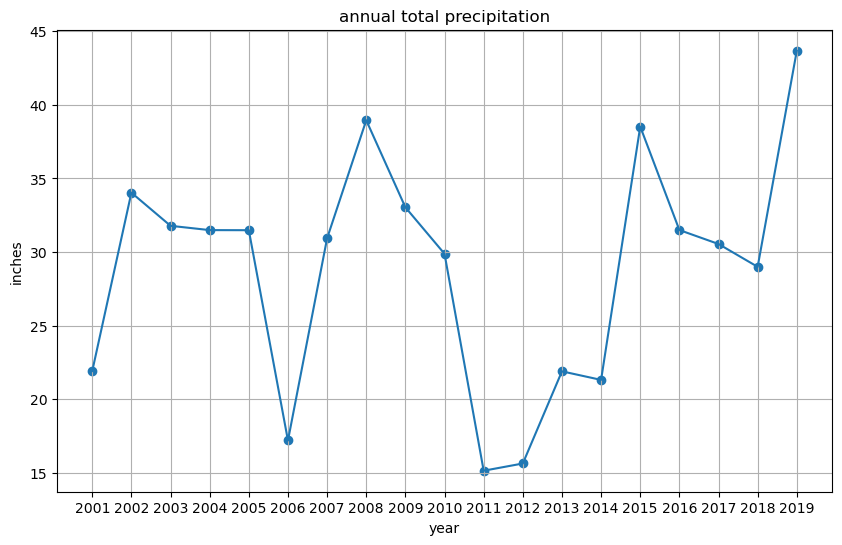

In [37]:
annualprecip = precipdf.groupby('year')['daily_precip'].agg(['sum','size']).rename(columns={'sum':'sum_precip','size':'count_values'})

fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(annualprecip.index,annualprecip['sum_precip'])
plt.plot(annualprecip.index, annualprecip['sum_precip'])
plt.xlabel("year")
plt.xticks(annualprecip.index)
plt.ylabel("inches")
plt.title("annual total precipitation")
plt.grid(True)

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot: title={'center': 'Average Total Precipitation'}, xlabel='Year', ylabel='total precipition (mm)'>>

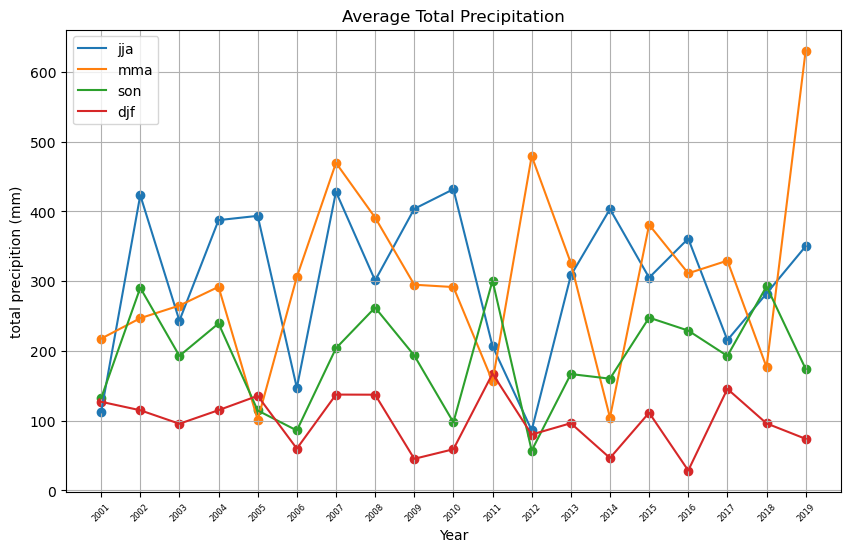

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))

seasons = ['jja', 'mma', 'son', 'djf']

# Iterate over each season's DataFrame
for i, season_df in enumerate([sumprecip_jja, sumprecip_mma, sumprecip_son, sumprecip_djf]):
    season_df = season_df[season_df['count_values'] > 10]
    plt.scatter(season_df['year'], season_df['sum_precip'])
    plt.plot(season_df['year'], season_df['sum_precip'],label=seasons[i])
# Customize the plot
plt.grid(True)
ax.legend()
plt.xticks(sumprecip_jja['year'], rotation=45, fontsize=6)
ax.set_xlabel('Year')
ax.set_title("Average Total Precipitation")
ax.set_ylabel('total precipition (mm)')
ax.set

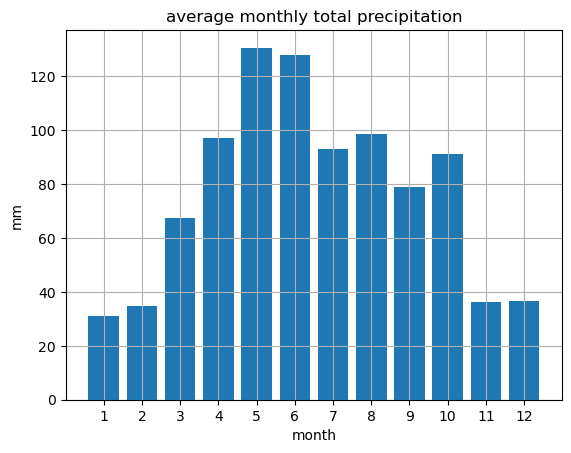

In [76]:
avgprecip = precipdf.groupby(['year','month'])['daily_precip'].agg(['sum', 'size']).rename(columns={'sum': 'sum_precip', 'size': 'count_values'})
avgprecip = avgprecip.groupby('month')['sum_precip'].mean()
avgprecip = pd.DataFrame(avgprecip)

avgprecip

plt.bar(avgprecip.index, avgprecip['sum_precip'])
plt.xlabel("month")
plt.xticks(avgprecip.index)
plt.ylabel("mm")
plt.title("average monthly total precipitation")
plt.grid(True)